# Task 1
## Let's Import the necessary Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sL

## Time to import our dataset

In [2]:
data = pd.read_csv("Task1Dataset.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


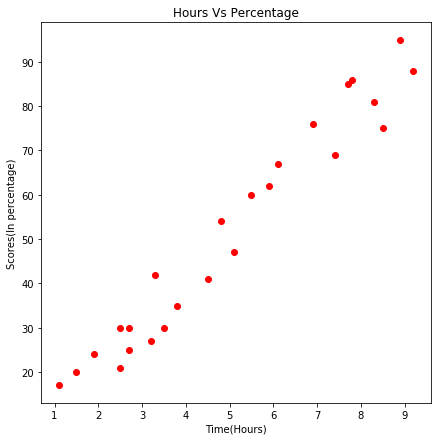

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(data['Hours'],data['Scores'],color='red')
plt.title('Hours Vs Percentage')
plt.xlabel('Time(Hours)')
plt.ylabel('Scores(In percentage)')
plt.show()

#### :> A kind of linear relationship is present...

## Separating I/p and O/p Feature

In [7]:
 X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values   

# Splitting The Data Into Train And Test (70-30)

In [8]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)  

In [9]:
print(np.shape(x_train))
print(np.shape(x_test))

(17, 1)
(8, 1)


## Let's Build the Model Now!

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lin_reg.coef_

array([9.78856669])

In [12]:
lin_reg.intercept_

2.370815382341867

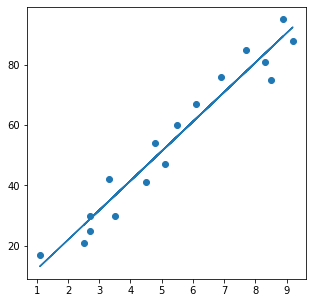

In [13]:
line = lin_reg.coef_*x_train + lin_reg.intercept_

# Straight line Equation : Y = m*X + C 

plt.figure(figsize=(5,5))
plt.scatter(x_train,y_train)
plt.plot(x_train,line)
plt.show()


## Time For Testing Our Model

In [14]:
y_pred = lin_reg.predict(x_test)
pd.DataFrame({'Observed':y_test,'Predicted':y_pred})

,Observed,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


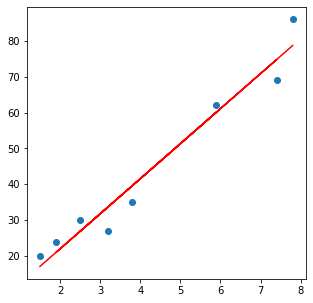

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='Red')
plt.show()

## Checking the Quality of the model

In [16]:

print('Training Score :', lin_reg.score(x_train,y_train))
print('\nTesting Score :', lin_reg.score(x_test,y_test))


Training Score : 0.9484997422695115

Testing Score : 0.9568211104435257


## Error Check

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,y_pred))
print("\nRoot Mean Squared Error ",np.sqrt(mean_squared_error(y_test,y_pred)))   

Mean Absolute Error  4.4197278080276545

Root Mean Squared Error  4.792191274636316


## Question: If a student studies for 9.25 hrs a day , what would be it's possible percentage in the result?

In [18]:
Hour = np.array([[9.25]])
Result = lin_reg.predict(Hour)
print('If the student study for',Hour[0][0],' hours, then he may score upto',Result[0],'%')

If the student study for 9.25  hours, then he may score upto 92.91505723477056 %


# Thank You!